In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# from sklearn.metrics import r2_score
# import statsmodels.api as sm

Use a linear model to fit linear data by adding powers of each feature as new features. Train linear model on extended set of features

In [2]:
df = pd.read_csv('../data_fetch/robinhood_data/100_most_popular_cleaned.csv')
df.head()

,Date,CPRX,CRBP,BABA,SNE,APHA,GOOGL,MSFT,AMZN,NRZ,...,SPY,UCO,VSLR,IBIO,SPHD,PSEC,KODK,SRNE,FCEL,NVAX
0,2015-09-08,3.89,1.8200,60.91,24.90,11.75,643.88,43.89,517.54,14.02,...,197.43,1206.5,13.26,7.200,31.450,7.99,14.98,13.23,10.8360,212.8
1,2015-09-09,3.97,1.8411,64.04,25.06,11.75,643.41,43.07,516.89,13.79,...,194.79,1127.0,13.18,7.200,31.070,7.93,15.11,12.65,11.1600,203.4
2,2015-09-10,4.14,1.8500,63.83,25.93,11.75,651.08,43.29,522.24,13.95,...,195.85,1186.5,12.99,7.100,31.100,7.97,15.25,13.28,11.5200,202.0
3,2015-09-11,3.90,1.9900,64.63,26.16,11.75,655.30,43.48,529.44,14.24,...,196.74,1142.5,13.14,7.031,31.240,7.94,15.48,13.53,11.3076,200.0
4,2015-09-14,4.11,2.1300,62.60,25.96,11.75,652.47,43.04,521.38,14.16,...,196.01,1100.0,12.66,6.691,31.222,7.91,14.99,12.89,11.0400,195.0


In [3]:
df

,Date,CPRX,CRBP,BABA,SNE,APHA,GOOGL,MSFT,AMZN,NRZ,...,SPY,UCO,VSLR,IBIO,SPHD,PSEC,KODK,SRNE,FCEL,NVAX
0,2015-09-08,3.89,1.8200,60.91,24.90,11.75,643.88,43.89,517.54,14.02,...,197.43,1206.50,13.26,7.200,31.450,7.99,14.98,13.23,10.8360,212.80
1,2015-09-09,3.97,1.8411,64.04,25.06,11.75,643.41,43.07,516.89,13.79,...,194.79,1127.00,13.18,7.200,31.070,7.93,15.11,12.65,11.1600,203.40
2,2015-09-10,4.14,1.8500,63.83,25.93,11.75,651.08,43.29,522.24,13.95,...,195.85,1186.50,12.99,7.100,31.100,7.97,15.25,13.28,11.5200,202.00
3,2015-09-11,3.90,1.9900,64.63,26.16,11.75,655.30,43.48,529.44,14.24,...,196.74,1142.50,13.14,7.031,31.240,7.94,15.48,13.53,11.3076,200.00
4,2015-09-14,4.11,2.1300,62.60,25.96,11.75,652.47,43.04,521.38,14.16,...,196.01,1100.00,12.66,6.691,31.222,7.91,14.99,12.89,11.0400,195.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2020-08-31,3.28,9.2850,287.03,78.64,4.87,1629.53,225.53,3450.96,7.74,...,349.31,33.41,30.88,2.090,34.060,5.10,5.98,8.01,2.8400,110.34
1257,2020-09-01,3.13,8.9100,298.00,79.50,4.78,1655.08,227.27,3499.12,7.65,...,352.60,33.68,31.90,1.970,33.980,5.06,7.30,7.63,2.9000,105.08
1258,2020-09-02,3.30,9.3800,296.07,79.49,4.72,1717.39,231.65,3531.45,7.70,...,357.70,32.00,31.16,2.010,34.750,5.10,7.16,7.27,2.6700,102.90
1259,2020-09-03,3.18,9.3800,282.50,77.38,4.70,1629.51,217.30,3368.00,7.55,...,345.39,31.62,27.93,1.860,34.330,5.06,6.46,7.06,2.4300,102.98


In [4]:
df_1 = df.copy()

In [5]:
import datetime as dt
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1['Date'] = df_1['Date'].map(dt.datetime.toordinal)

In [6]:
# type(df_1['Date'][0])

In [7]:
df_1a = df_1[['Date', 'AMZN']]

In [8]:
df_1a = df_1a.reset_index()
df_1a

,index,Date,AMZN
0,0,735849,517.54
1,1,735850,516.89
2,2,735851,522.24
3,3,735852,529.44
4,4,735855,521.38
...,...,...,...
1256,1256,737668,3450.96
1257,1257,737669,3499.12
1258,1258,737670,3531.45
1259,1259,737671,3368.00


In [9]:
df_1a.drop(columns=['index'], axis=1, inplace=True)

In [10]:
df_1a['AMZN'] = df_1a['AMZN'].round().astype('Int64')

In [25]:
date_train, date_test, close_train, close_test = train_test_split(
    df_1a['Date'], df_1a['AMZN'], test_size=0.20, random_state=42)

In [12]:
# splitting for plotting the training and testing data
date_train1, date_test1, close_train1, close_test1 = train_test_split(
    df_1['Date'], df_1['AMZN'], test_size=0.20, random_state=42)


In [13]:
type(close_train[0])

numpy.int64

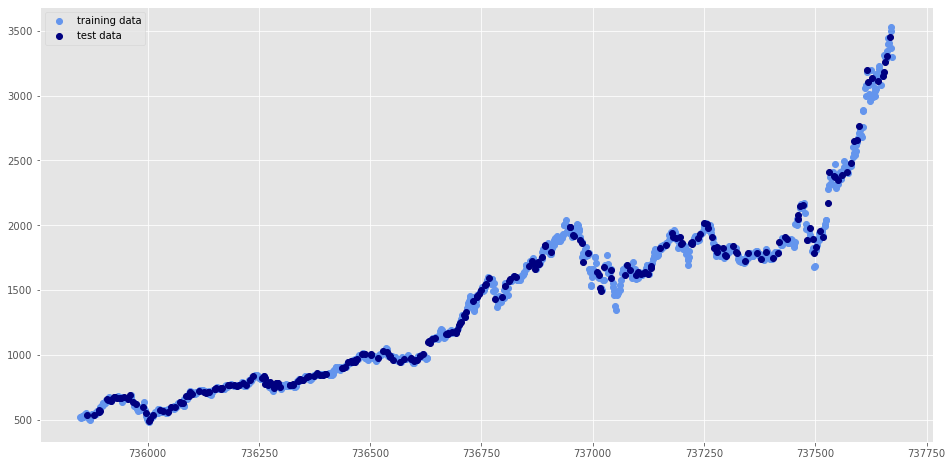

In [14]:

# plotting the training and testing data
lw = 1

plt.figure(figsize=(16,8))
plt.scatter(date_train1, close_train1, color='cornflowerblue', linewidth=lw,
           label='training data')
plt.scatter(date_test1, close_test1, color='navy', linewidth=lw,
           label='test data')
plt.legend()
plt.show()

In [29]:
# data formatting

date_train_b = np.array(date_train).reshape(-1, 1)
close_train_b = np.array(close_train).reshape(-1, 1)

In [16]:
len(close_train)

1008

In [22]:
# inear regression retry
lin_reg = LinearRegression()

There was an error when doing the full data set "sklearn error ValueError: Input contains NaN, infinity or a value too large for dtype('float64')" Looking at the documentation it looks like this type of algorithm is used on less data points 

In [30]:
lin_reg.fit(date_train_b, close_train_b)

AttributeError: 'bool' object has no attribute 'any'